In [12]:
import os
import xml.etree.ElementTree as et

In [13]:
def convert(PATH, output, IMG_SIZE):
    for file in os.listdir(PATH):
        try:
            tree=et.parse(os.path.join(PATH,file))
            root=tree.getroot()
            txt_file=open(os.path.join(output,file.split('.')[0]+".txt"),'w')
            for child in root.findall('object'):
                class_name=child.find('name').text
                for subchild in child.findall('bndbox'):
                    cx=subchild.find('xmin').text
                    cy=subchild.find('ymin').text
                    x=subchild.find('xmax').text
                    y=subchild.find('ymax').text
                    
                    x1= (float(cx) + float(x)) /2
                    x2 = (float(cy) + float(y)) /2
                    w = float(x) - float(cx)
                    h = float(y) -float(cy)

                    x=x1/IMG_SIZE
                    y=x2/IMG_SIZE
                    w=w/IMG_SIZE
                    h=h/IMG_SIZE
    
                    bndbox=[x,y,w,h]
                    txt_file.write(str(0)+" "+" ".join(str(a) for a in bndbox)+'\n')
        except:
            print(file)


In [21]:
PATH=os.path.join(os.getcwd(), os.path.normpath('SATELLITE_IMAGE/DSDD/annotations/HorizontalBox/test'))
out=os.path.normpath('Datasets/DSDD/labels')
convert(PATH,out, 256)

000013.xml


In [1]:
import os

In [2]:
DIR=os.path.join(os.getcwd(), os.path.normpath('Datasets/SSDD/images/000219.jpg'))
labels=os.path.join(os.getcwd(), os.path.normpath('Datasets/SSDD/labels/000219.txt'))

In [3]:
boxes=[]
with open(labels) as file:
    for line in file:
        t=line.split(" ")
        boxes.append(t[1:])

In [4]:
boxes

[['0.3858173076923077',
  '0.14302884615384615',
  '0.3629807692307692',
  '0.15144230769230768\n'],
 ['0.4723557692307692',
  '0.3545673076923077',
  '0.35336538461538464',
  '0.15625\n'],
 ['0.5709134615384616',
  '0.5168269230769231',
  '0.31971153846153844',
  '0.11057692307692307\n'],
 ['0.5492788461538461',
  '0.47596153846153844',
  '0.27163461538461536',
  '0.10096153846153846\n'],
 ['0.47716346153846156',
  '0.7716346153846154',
  '0.13221153846153846',
  '0.07211538461538461\n'],
 ['0.6935096153846154',
  '0.8774038461538461',
  '0.27163461538461536',
  '0.10096153846153846\n'],
 ['0.7055288461538461',
  '0.8197115384615384',
  '0.2764423076923077',
  '0.08653846153846154\n'],
 ['0.5036057692307693',
  '0.8653846153846154',
  '0.0889423076923077',
  '0.07211538461538461\n'],
 ['0.6899038461538461',
  '0.7103365384615384',
  '0.2644230769230769',
  '0.10817307692307693\n']]

In [14]:
bb=[]
for i in boxes:
    t=[]
    for l in i:
        t.append(float(l)*416)
    bb.append(t)

In [15]:
import numpy as np
def conv(x):
    x=np.array(x)
    temp=np.empty(4)
    dw = x[..., 2] / 2  # half-width
    dh = x[..., 3] / 2  # half-height
    temp[..., 0] = x[..., 0] - dw  # top left x
    temp[..., 1] = x[..., 1] - dh  # top left y
    temp[..., 2] = x[..., 0] + dw  # bottom right x
    temp[..., 3] = x[..., 1] + dh  # bottom right y
    return temp


In [16]:
f=[]
for b in bb:
    f.append(conv(b))
    

In [17]:
f

[array([ 85.,  28., 236.,  91.]),
 array([123., 115., 270., 180.]),
 array([171., 192., 304., 238.]),
 array([172., 177., 285., 219.]),
 array([171., 306., 226., 336.]),
 array([232., 344., 345., 386.]),
 array([236., 323., 351., 359.]),
 array([191., 345., 228., 375.]),
 array([232., 273., 342., 318.])]

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [21]:
def plot_image(image,bnd_boxes):
    # Open the image
    img = Image.open(image)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(img)
    
    # Add bounding boxes to the image
    for box in bnd_boxes:

        # box is assumed to be a tuple or list of (x_min, y_min, x_max, y_max)
        x_min, y_min, x_max, y_max = box[0],box[1],box[2],box[3]
        width = x_max - x_min
        height = y_max - y_min

        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    
    # Show plot
    plt.show()

<class 'numpy.ndarray'>
[ 85.  28. 236.  91.]
<class 'numpy.ndarray'>
[123. 115. 270. 180.]
<class 'numpy.ndarray'>
[171. 192. 304. 238.]
<class 'numpy.ndarray'>
[172. 177. 285. 219.]
<class 'numpy.ndarray'>
[171. 306. 226. 336.]
<class 'numpy.ndarray'>
[232. 344. 345. 386.]
<class 'numpy.ndarray'>
[236. 323. 351. 359.]
<class 'numpy.ndarray'>
[191. 345. 228. 375.]
<class 'numpy.ndarray'>
[232. 273. 342. 318.]


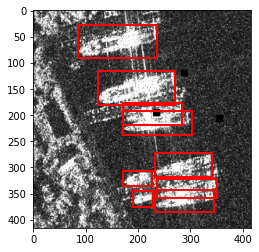

In [22]:
plot_image(DIR, f)

In [1]:
from PIL import Image

In [4]:
img=Image.open('Temp/t.jpg')

In [7]:
boxes=[]
with open('Temp/t.txt') as file:
    for line in file:
        t=line.split(" ")
        boxes.append(t[1:])

In [9]:
bb=[]
for i in boxes:
    t=[]
    for l in i:
        t.append(float(l)*256)
    bb.append(t)

In [10]:
bb

[[96.0, 20.0, 12.0, 10.0]]

<class 'list'>
[96.0, 20.0, 12.0, 10.0]
Rectangle(xy=(96, 20), width=12, height=10, angle=0)


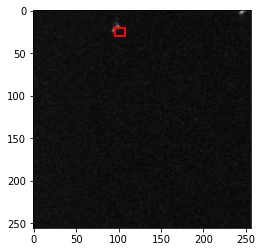

In [15]:
plot_image('Temp/t.jpg',bb)